## Data Analysis with Python and Pandas

In [1]:
import pandas as pd
import datetime
try:
    import pandas_datareader.data as web
except ImportError:
    pass
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

import numpy as np
import pickle

import quandl

In [9]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)

try:
    df = web.DataReader("XOM", "yahoo", start, end)
except NameError:
    df = pd.read_csv("file_name.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,68.839996,68.860001,68.110001,68.190002,53.863396,18852300
1,2010-01-04,68.720001,69.260002,68.190002,69.150002,54.621700,27809100
2,2010-01-05,69.190002,69.449997,68.800003,69.419998,54.834965,30174700
3,2010-01-06,69.449997,70.599998,69.339996,70.019997,55.308914,35044700
4,2010-01-07,69.900002,70.059998,69.419998,69.800003,55.135132,27192100


In [3]:
# write DataFrame to csv for working offline

# df.to_csv("file_name.csv")

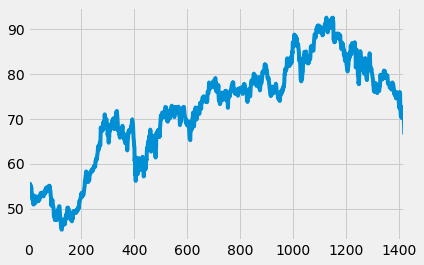

In [10]:
df['Adj Close'].plot()

plt.show()

Pandas can interact with a lot of data types

CSV, SQL, HTML etc

From whatever format u import the data, handling the DataFrame is identical

Applying various operations, calculations and statistical anlysis on a DataFrame is very fast

#### Pandas Basics

In [5]:
style.use('ggplot')

# DF is like apython dict

web_data = {'Day': [1,2,3,4,5,6],
           'Visitors': [43,53,34,45,64,34],
           'Bounce_Rate': [65,72,62,64,54,66]}

# we can convert this to df very easily

df = pd.DataFrame(web_data)



# setting an index

df.set_index("Day")

# the change in index does not reflect here

df.head()

,Bounce_Rate,Day,Visitors
0,65,1,43
1,72,2,53
2,62,3,34
3,64,4,45
4,54,5,64


When u execute ```df.set_index("Day")``` u are returned a ** new ** dataframe

In [6]:
# options 

# df = df.set_axis("Day")

# OR

# print df

# df.set_index("Day", inplace=True)

df

,Bounce_Rate,Day,Visitors
0,65,1,43
1,72,2,53
2,62,3,34
3,64,4,45
4,54,5,64
5,66,6,34


#### Referencing

In [19]:
# referencing multiple columns

df[['Bounce_Rate', 'Visitors']]

# convert o/p to list

print (df['Visitors'].tolist())

KeyError: "['Bounce_Rate' 'Visitors'] not in index"

tolist() works for single cols but not for multiple cols

```
df[['Bounce_Rate', 'Visitors']].tolist()
```
does not work

**We need to convert it to a numpy array**

In [ ]:
print np.array(df[['Bounce_Rate', 'Visitors']])

# Converting numpy array to df

pd.DataFrame(np.array(df[['Bounce_Rate', 'Visitors']]))

#### IO Basics

```kfJuWbUakQJH6gez_VFr```

In [20]:
quandl.get("ZILLOW/Z77006_ZRIFAH", authtoken="kfJuWbUakQJH6gez_VFr")

# read local csv

df = pd.read_csv("ZILLOW-Z77006_ZRIMFRR.csv")

# df.head()

df.set_index('Date', inplace=True)

df.to_csv('newcsv2.csv')

df = pd.read_csv('newcsv2.csv')

df.head()

# we lost our index again

df = pd.read_csv('newcsv2.csv', index_col=0)

df.head()

,Value
Date,
12/31/2017,1447
11/30/2017,1442
10/31/2017,1429
9/30/2017,1429
8/31/2017,1436


In [ ]:
# renaming cols

# Note: Date is not a column anymore as it is an index

df.columns = ['Austing_HPI'] #HPI: House Price Index

df.head()

#### Convert Pandas DataFrame to HTML (Table)

In [ ]:
df.to_html('example.html')

In [ ]:
# fresh df

df = pd.read_csv("ZILLOW-Z77006_ZRIMFRR.csv", names=['Date', 'Austin_HPI'])
df.head()

df.rename(columns={'Austin_HPI': '77006_HPI'}, inplace=True)

df.head()

#### Building Dataset

---

#### Real Estate Analysis

QUANDL API Key: ```kfJuWbUakQJH6gez_VFr```

#### Link to get data from:

[House Price Index Data](https://www.quandl.com/data/FMAC-Freddie-Mac?keyword=House%20Price%20Index)

In Quandl u can limit the data by the **trim_start** param

In [3]:
apiKey = 'kfJuWbUakQJH6gez_VFr'

df = quandl.get('FMAC/HPI_AK', authtoken=apiKey)

df.head()

,Value
Date,
1975-01-31,34.527918
1975-02-28,35.026256
1975-03-31,35.536666
1975-04-30,36.074757
1975-05-31,36.676178


Now we want this to execute for all US states

But we want to automate it

List of US states: [list](https://simple.wikipedia.org/wiki/List_of_U.S._states)

We will use python pandas htm  reader to read this table

In [15]:
fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

# this will read all the tables and return a list of dataframes

fifty_states[0].head()

# first df is the one we need

,0,1,2,3
0,Abbreviation,State Name,Capital,Became a State
1,AL,Alabama,Montgomery,"December 14, 1819"
2,AK,Alaska,Juneau,"January 3, 1959"
3,AZ,Arizona,Phoenix,"February 14, 1912"
4,AR,Arkansas,Little Rock,"June 15, 1836"


In [16]:
# we want first column

fifty_states[0][0]

# first row contains col header.. we dont want that

for abbr in fifty_states[0][0][1:5]:
    print ("FMAC/HPI_" + str(abbr))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR


#### Concatenating and Appending DataFrames

In [ ]:
# sample dfs

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

# df1 and df3 have same indices but diff cols

# df1 and df2 have diff indices but same cols

# df2 and df3 have diff indices and cols

# this is like UNION

concat = pd.concat([df1, df2])

print concat

concat2 = pd.concat([df1, df3, df2])

print concat2

# concat adds to bottom

# but indices are repeated..


In [ ]:
# appending dfs

# append adds to the end

df4 = df1.append(df2)
df4

** Note **: Pandas is meant for data manipulation.. U can add new cols to it
But appending new data to a df is not efficient 

In [ ]:
df5 = df1.append(df3)
df5

#### Adding a Series

In [ ]:
s = pd.Series([80, 2, 50], index=['HPI', 'Int_rate', 'US_GDP_Thousands'])

df6 = df1.append(s, ignore_index=True)

df6

#### Joining and Merging DataFrames

They are kind of similar

But have subtle diff

In [23]:
# sample data


df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

merged1 = pd.merge(df1, df2, on=['HPI'])

merged2 = pd.merge(df1, df2, on=['HPI', 'Int_rate'])

print(merged1)

print(merged2)


   HPI  Int_rate_x  US_GDP_Thousands_x  Int_rate_y  US_GDP_Thousands_y
0   80           2                  50           2                  50
1   85           3                  55           3                  55
2   85           3                  55           2                  55
3   85           2                  55           3                  55
4   85           2                  55           2                  55
5   88           2                  65           2                  65
   HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55


On merging we lose index entirely


In [ ]:
# JOIN

# Set the indexes for df1 and df3

# df1.set_index('HPI', inplace=True)
# df3.set_index('HPI', inplace=True)

# Now df1 and df3 have same indices but diff columns

# join df1 and df3

# joined = df1.join(df3)

joined

#### Joins without indices: MERGE

Merege is like an JOIN IN SQL

In [8]:
copy_of_df1 = pd.DataFrame({'Year':[2001, 2002, 2003, 2004],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]}
                  )


copy_of_df3 = pd.DataFrame({'Year':[2001, 2003, 2004, 2005],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]}
                  )

# default: INNER

merged = pd.merge(copy_of_df1, copy_of_df3, on='Year')

merged.set_index('Year', inplace=True)

merged

# LEFT JOIN

merged_left = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='left')

merged_left.set_index('Year', inplace=True)

merged_left

# RIGHT JOIN

merged_right = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='right')

merged_right.set_index('Year', inplace=True)

merged_right

# OUTER

merged_outer = pd.merge(copy_of_df1, copy_of_df3, on='Year', how='outer')

merged_outer.set_index('Year', inplace=True)

merged_outer



,Int_rate,US_GDP_Thousands,Low_tier_HPI,Unemployment
Year,,,,
2001,2.0,50.0,50.0,7.0
2002,3.0,55.0,NaN,NaN
2003,2.0,65.0,52.0,8.0
2004,2.0,55.0,50.0,9.0
2005,NaN,NaN,53.0,6.0


** Use Merge when index does not matter to u.. Use Join when index matters to u **

#### Pickling and Building our Dataset

We will ccombine the data using **JOIN**

They already share an index: Date

So we use JOIN

**Note**: Column names should be diff while using JOIN
So we used:

```
df.columns =[str(abbr)]
```

By default Quandl named column of each df as 'Value'

### Pickling

The idea of a pickle is to save any python object

var, list, dict, df, classifier, anything... can be saved

It serializes and saves the byte code

So if u save the main_df, u dont need to run the loop to get all the data everytime

** Another option **

u can save main_df to a csv and tehnload it back

But what if ur data is too large for this

Also u cant save an ML classifier to a csv

So Pickling is better

In [3]:
import pickle

In [35]:
def state_list():
    fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    # this will read all the tables and return a list of dataframes
    # first df is the one we need
    # we want first column
    # first row contains col header.. we dont want that
    return fifty_states[0][0][1:]

def grab_initial_state_data():
    
    states = state_list()
    main_df = pd.DataFrame()

    for abbr in states:
        print ("FMAC/HPI_" + str(abbr))
        query = "FMAC/HPI_" + str(abbr)
        df = quandl.get(query, authtoken = apiKey)
        # print(df.head())
        df.columns =[str(abbr)]

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
        pickle_out = open('fifty_states.pickle', 'wb')
        pickle.dump(main_df,pickle_out)
        pickle_out.close()
        
        
grab_initial_state_data()

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [33]:
main_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875


In [5]:
pickle_in = open('fifty_states.pickle', 'rb')

HPI_data = pickle.load(pickle_in)

HPI_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875


#### Pandas Pickle Version

- Easier to read
- A bit faster

In [6]:
HPI_data.to_pickle('pandas_pickle.pickle')

HPI_data2 = pd.read_pickle('pandas_pickle.pickle')

HPI_data2.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.303417,34.527918,28.940032,36.838815,15.644547,19.630026,24.448197,27.122817,31.178268,30.721998,...,37.928775,32.256816,32.582514,24.537282,26.562005,27.945021,17.331629,40.881718,28.364836,31.425109
1975-02-28,35.502507,35.026256,29.409528,37.223497,15.693093,19.821180,24.978337,27.108578,32.306122,30.475086,...,37.463460,32.272559,32.956762,24.915536,26.880710,28.213562,17.437792,41.956890,28.719369,31.929642
1975-03-31,35.734654,35.536666,29.861852,37.561809,15.887119,20.013280,25.376128,27.132215,34.048244,30.372700,...,36.994328,32.335014,33.592795,25.252674,27.189255,28.419414,17.570050,43.075651,29.044479,32.459696
1975-04-30,36.015829,36.074757,30.227061,37.836285,16.203236,20.207580,25.589234,27.243265,36.262987,30.430184,...,36.533508,32.448240,34.460884,25.517926,27.471153,28.586343,17.712653,44.224846,29.310520,32.998744
1975-05-31,36.267298,36.676178,30.433976,38.086996,16.459320,20.382426,25.635869,27.469625,36.488976,30.522158,...,36.119922,32.589892,34.658289,25.694623,27.719357,28.743314,17.836880,45.371374,29.518618,33.505875


In [7]:
# adding new col

HPI_data['TX2'] = HPI_data['TX']*2
    
print(HPI_data[['TX', 'TX2']].head())

                   TX        TX2
Date                            
1975-01-31  32.582514  65.165028
1975-02-28  32.956762  65.913524
1975-03-31  33.592795  67.185589
1975-04-30  34.460884  68.921768
1975-05-31  34.658289  69.316578


#### Plotting Values

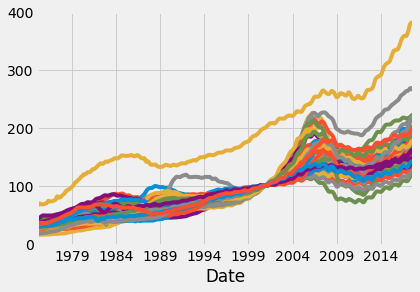

In [14]:
HPI_data.plot()

plt.legend().remove()

plt.show()

### Calculating Percent Changes

#### Percent change at every successive point 

In [18]:
def state_list():
    fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    # this will read all the tables and return a list of dataframes
    # first df is the one we need
    # we want first column
    # first row contains col header.. we dont want that
    return fifty_states[0][0][1:]

def grab_initial_state_data():
    
    states = state_list()
    main_df = pd.DataFrame()

    for abbr in states:
        # print ("FMAC/HPI_" + str(abbr))
        query = "FMAC/HPI_" + str(abbr)
        df = quandl.get(query, authtoken = apiKey)
        # print(df.head())
        df.columns =[str(abbr)]
        
        df = df.pct_change()

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
        pickle_out = open('fifty_states_pct_df.pickle', 'wb')
        pickle.dump(main_df,pickle_out)
        pickle_out.close()
        
        
grab_initial_state_data()

In [19]:
HPI_data_pct_df = pd.read_pickle('fifty_states_pct_df.pickle')

HPI_data_pct_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.005639,0.014433,0.016223,0.010442,0.003103,0.009738,0.021684,-0.000525,0.036174,-0.008037,...,-0.012268,0.000488,0.011486,0.015415,0.011999,0.009610,0.006125,0.026300,0.012499,0.016055
1975-03-31,0.006539,0.014572,0.015380,0.009089,0.012364,0.009692,0.015925,0.000872,0.053925,-0.003360,...,-0.012522,0.001935,0.019299,0.013531,0.011478,0.007296,0.007585,0.026665,0.011320,0.016601
1975-04-30,0.007868,0.015142,0.012230,0.007307,0.019898,0.009709,0.008398,0.004093,0.065047,0.001893,...,-0.012456,0.003502,0.025842,0.010504,0.010368,0.005874,0.008116,0.026679,0.009160,0.016607
1975-05-31,0.006982,0.016672,0.006845,0.006626,0.015804,0.008652,0.001822,0.008309,0.006232,0.003022,...,-0.011321,0.004365,0.005728,0.006924,0.009035,0.005491,0.007013,0.025925,0.007100,0.015368


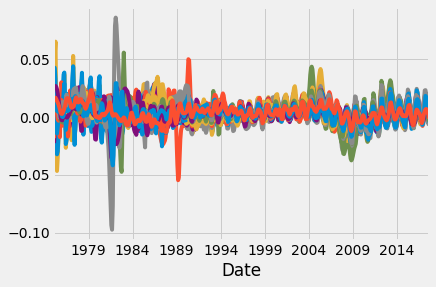

In [20]:
HPI_data_pct_df.plot()

plt.legend().remove()

plt.show()

With pandas the ```pct_change()``` method computes at each and every data point successively

#### Percentage Change calculated from a starting point

In [9]:
def state_list():
    fifty_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    # this will read all the tables and return a list of dataframes
    # first df is the one we need
    # we want first column
    # first row contains col header.. we dont want that
    return fifty_states[0][0][1:]

def grab_initial_state_data():
    
    states = state_list()
    main_df = pd.DataFrame()

    for abbr in states[:]:
        # print ("FMAC/HPI_" + str(abbr))
        query = "FMAC/HPI_" + str(abbr)
        df = quandl.get(query, authtoken = apiKey)
        # print(df.head())
        df.columns =[str(abbr)]
        
        df[abbr] = (df[abbr] - df[abbr][0])*100/df[abbr][0]
        
        # print(df.head())

        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
        pickle_out = open('fifty_states_pct_df_starting_pt.pickle', 'wb')
        pickle.dump(main_df, pickle_out)
        pickle_out.close()
    
    return main_df
        
main_df = grab_initial_state_data()

print(main_df.head())


                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.563941  1.443292  1.622304  1.044229  0.310304  0.973785   
1975-03-31  1.221516  2.921545  3.185277  1.962586  1.550517  1.952386   
1975-04-30  2.017970  4.479968  4.447226  2.707659  3.571143  2.942198   
1975-05-31  2.730277  6.221807  5.162205  3.388223  5.208027  3.832904   

                  CT        DE         FL        GA    ...           SD  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.168419 -0.052497   3.617438 -0.803698    ...    -1.226813   
1975-03-31  3.795496  0.034649   9.205056 -1.136961    ...    -2.463689   
1975-04-30  4.667161  0.444086  16.308538 -0.949851    ...    -3.678649   
1975-05-31  4.857912  1.278660 

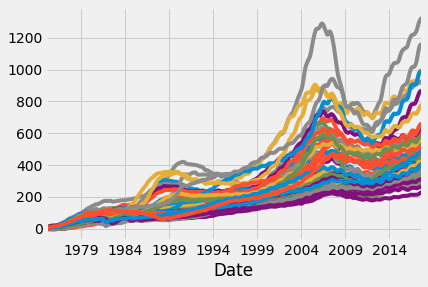

In [10]:
HPI_data_pct_start_df = pd.read_pickle('fifty_states_pct_df_starting_pt.pickle')

HPI_data_pct_start_df.head()

HPI_data_pct_start_df.plot()

plt.legend().remove()

plt.show()

We want HPI data for USA as a whole

We want to use this data as a kind of benchmark

In [11]:
df = quandl.get("FMAC/HPI_USA", authtoken=apiKey)

df.head()

,Value
Date,
1975-01-31,23.424665
1975-02-28,23.576738
1975-03-31,23.827713
1975-04-30,24.154570
1975-05-31,24.354313


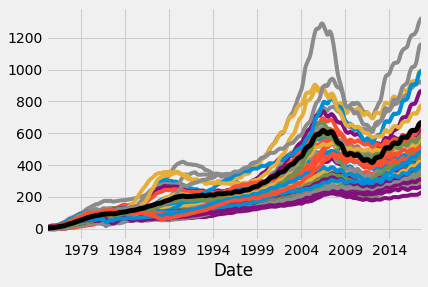

In [13]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=apiKey)
    
    df.columns = ["United States"]
    
    df["United States"] = (df["United States"] - df["United States"][0])*100/df["United States"][0]
    
    return df

# matplotlib stuff

fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data_pct_start_df = pd.read_pickle('fifty_states_pct_df_starting_pt.pickle')

benchmark = HPI_Benchmark()

HPI_data_pct_start_df.plot(ax=ax1)

benchmark.plot(ax=ax1, color='k', linewidth=5)

plt.legend().remove()

plt.show()

#### Benchmark is kind of in the middle of all the data (average)

#### We want to find how correlated every state is to each other


In [25]:
HPI_State_Correlation = HPI_data_pct_start_df.corr()

HPI_State_Correlation.head()

HPI_State_Correlation.describe()



,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.969845,0.942585,0.937087,0.971922,0.949042,0.951452,0.927643,0.962311,0.933539,0.955844,...,0.961081,0.970770,0.932715,0.957832,0.963305,0.967082,0.966906,0.964810,0.965258,0.942548
std,0.025466,0.040180,0.025770,0.025437,0.022641,0.030284,0.040598,0.028586,0.028985,0.025213,...,0.034307,0.025386,0.040500,0.031274,0.029685,0.025393,0.023565,0.031172,0.025319,0.041965
min,0.881332,0.785736,0.860392,0.870650,0.876620,0.847378,0.816186,0.871262,0.849449,0.864569,...,0.824130,0.867048,0.803584,0.859219,0.848529,0.854787,0.875904,0.841929,0.886364,0.783301
25%,0.956978,0.931489,0.923835,0.967419,0.936985,0.935266,0.900957,0.950959,0.917134,0.946831,...,0.950567,0.960702,0.915896,0.943989,0.957828,0.961572,0.959556,0.956100,0.956621,0.927137
50%,0.977239,0.952145,0.939052,0.978546,0.947678,0.957982,0.932697,0.968533,0.932336,0.958788,...,0.972241,0.976787,0.937833,0.964818,0.971730,0.973781,0.972810,0.975587,0.969701,0.954057
75%,0.985701,0.964436,0.948415,0.989498,0.964576,0.973100,0.958147,0.980440,0.950619,0.972748,...,0.982490,0.988181,0.960506,0.981719,0.980034,0.980237,0.980383,0.983638,0.984923,0.966324
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We want to find out list of states where correlation falls below 80%

In [60]:
min_data = HPI_State_Correlation.describe().loc['min']


min_data.sort_values(inplace=True)

min_data

ND    0.738463
NV    0.738463
MI    0.747471
WY    0.783301
AK    0.785736
HI    0.798098
TX    0.803584
OK    0.813140
CT    0.816186
SD    0.824130
LA    0.825137
OH    0.827145
MT    0.833938
IL    0.841029
RI    0.841601
WV    0.841929
CO    0.847378
IA    0.847644
VT    0.848529
FL    0.849449
MD    0.853456
VA    0.854787
NE    0.855023
UT    0.859219
KS    0.859964
AZ    0.860392
KY    0.860622
IN    0.863829
GA    0.864569
NJ    0.864811
NY    0.865276
NH    0.866317
TN    0.867048
NM    0.867485
PA    0.867777
MS    0.870232
AR    0.870650
DE    0.871262
OR    0.871755
NC    0.872960
ME    0.873563
WA    0.875904
CA    0.876620
ID    0.876891
AL    0.881332
SC    0.885946
WI    0.886364
MA    0.886583
MN    0.890775
MO    0.898647
Name: min, dtype: float64

** Required states are: ND, NV, MI, WY, AK, HI **

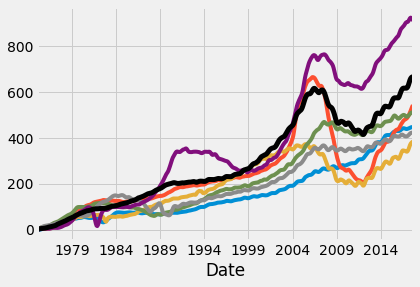

In [66]:
diff_data = HPI_data_pct_start_df[['ND', 'NV', 'MI', 'WY', 'AK', 'HI']]


# matplotlib stuff

fig = plt.figure()

ax1 = plt.subplot2grid((1,1), (0,0))

diff_data.plot(ax=ax1)

benchmark.plot(ax=ax1, color='k', linewidth=5)

plt.legend().remove()

plt.show()

Not much diffence in the trends...

### Re Sampling

U can inc or dec granularity

Fr eg, stock prices is a milli seclevel data

But that level of granularity is not reqd

We can resample it to a day-level data

What we can do is collect all the data for the day and **average** it

Instead of avg, we can also do a sum

We ccan also find highest, lowest, st